# Install and Import Libraries

In [ ]:
# Install Data and Visualization Tools
!pip install pandas
!pip install yfinance
!pip install matplotlib
!pip install numpy
# Install Time Series Analysis and Machine Learning Libraries
!pip install scikit-learn
!pip install statsmodels
!pip install pmdarima

In [94]:
# Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Get Data

In [3]:
# Get the list of stock tickers
tickers=['WMT', 'TGT', 'COST', 'HD', 'DG']
data=yf.download(tickers, start = '2014-01-01', end = '2025-01-01')
data

C:\Users\leonh\AppData\Local\Temp\ipykernel_22372\3295092309.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers, start = '2014-01-01', end = '2025-01-01')
[*********************100%***********************]  5 of 5 completed


Price            Close                                                \
Ticker            COST         DG          HD         TGT        WMT   
Date                                                                   
2014-01-02   94.012115  53.548218   62.777782   45.266071  20.899691   
2014-01-03   93.597160  53.355736   62.678288   45.488186  20.830822   
2014-01-06   92.886978  52.157028   62.073627   45.180096  20.714289   
2014-01-07   92.456017  52.402012   62.379795   45.072624  20.777851   
2014-01-08   91.011642  52.235764   62.708900   44.915005  20.613646   
...                ...        ...         ...         ...        ...   
2024-12-24  955.192139  73.211266  391.210724  129.796585  92.203255   
2024-12-26  952.522278  74.182312  390.223175  133.708115  92.312691   
2024-12-27  936.144531  74.437340  387.971527  132.835632  91.188515   
2024-12-30  918.720703  74.241173  384.584198  132.394485  90.104111   
2024-12-31  912.803162  74.368683  384.149689  132.521912  89.885246   

Price             High                                                ...  \
Ticker            COST         DG          HD         TGT        WMT  ...   
Date                                                                  ...   
2014-01-02   95.201137  53.915704   63.198753   45.975367  21.048009  ...   
2014-01-03   94.451018  54.046964   63.129874   45.774769  20.957952  ...   
2014-01-06   93.964274  53.661980   62.747180   45.631465  20.899687  ...   
2014-01-07   93.014613  52.865745   62.701260   45.344881  20.883793  ...   
2014-01-08   92.599656  52.550754   62.716556   45.008146  20.793747  ...   
...                ...        ...         ...         ...        ...  ...   
2024-12-24  955.750017  73.574186  391.210724  130.061280  92.203255  ...   
2024-12-26  955.779864  74.368677  390.855196  134.247303  92.402224  ...   
2024-12-27  946.853857  75.055278  390.549066  134.394364  91.874960  ...   
2024-12-30  930.635412  74.780640  386.342048  133.757153  90.601539  ...   
2024-12-31  921.241085  74.868923  386.588955  133.904190  90.472215  ...   

Price             Open                                                 Volume  \
Ticker            COST         DG          HD         TGT        WMT     COST   
Date                                                                            
2014-01-02   94.730315  52.830742   62.846671   45.516832  20.849368  1618400   
2014-01-03   94.331317  53.565730   62.693599   45.581324  20.873199  1293500   
2014-01-06   93.756793  53.565732   62.494598   45.624301  20.886445  2120200   
2014-01-07   92.878954  52.340764   62.234368   45.158599  20.703693  2292500   
2014-01-08   92.599656  52.393259   62.410396   45.000982  20.791100  4600000   
...                ...        ...         ...         ...        ...      ...   
2024-12-24  947.142694  73.073946  387.250612  129.277008  89.905140   939000   
2024-12-26  953.199698  73.319159  387.635751  129.855399  92.063977   969000   
2024-12-27  945.130362  73.946911  387.260515  132.472913  91.656091  1943400   
2024-12-30  927.477423  74.319636  385.670516  131.757258  90.263291  1881200   
2024-12-31  920.155243  74.241174  385.157016  132.835627  90.104116  1742900   

Price                                             
Ticker           DG        HD      TGT       WMT  
Date                                              
2014-01-02  6018200   4253400  7400100  20634000  
2014-01-03  2697800   3897900  4589400  14872200  
2014-01-06  4007800  11188800  4609600  21840600  
2014-01-07  2584500   4630900  5398300  15036900  
2014-01-08  4418700   4662300  5529900  17865600  
...             ...       ...      ...       ...  
2024-12-24  1542300   1392600  1647700   8992400  
2024-12-26  3600700   1319500  5042000  10994000  
2024-12-27  2659700   1942700  3089000  11384400  
2024-12-30  3775400   2444700  3945600   9790200  
2024-12-31  3500400   2179700  2830200  11267700  

[2768 rows x 25 columns]

In [11]:
# Get the list of stock tickers
tickers=['WMT', 'TGT', 'COST', 'HD', 'DG']
curr_data=yf.download(tickers, start = '2025-01-01', end = None)
curr_data

C:\Users\leonh\AppData\Local\Temp\ipykernel_22372\595652815.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  curr_data=yf.download(tickers, start = '2025-01-01', end = None)
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            COST          DG          HD         TGT         WMT   
Date                                                                     
2025-01-02  906.367554   74.182312  383.626282  134.492401   89.537041   
2025-01-03  913.112000   73.240685  384.337311  133.119919   90.313034   
2025-01-06  919.218811   74.398102  384.524963  136.551102   90.959686   
2025-01-07  917.883850   73.320587  379.448944  136.511902   90.342873   
2025-01-08  923.861084   70.799797  382.381958  135.502136   91.327789   
...                ...         ...         ...         ...         ...   
2025-08-01  952.520020  108.529999  373.660004   99.769997   98.489998   
2025-08-04  955.369995  110.940002  380.820007   99.790001   99.589996   
2025-08-05  943.630005  110.860001  385.410004  102.430000   99.309998   
2025-08-06  968.559998  113.320000  386.799988  105.389999  103.360001   
2025-08-07  977.450012  115.629997  386.170013  105.669998  103.120003   

Price             High                                                  ...  \
Ticker            COST          DG          HD         TGT         WMT  ...   
Date                                                                    ...   
2025-01-02  922.267188   76.546184  387.783917  136.149173   90.133953  ...   
2025-01-03  920.713135   74.456954  386.144556  135.315878   90.830363  ...   
2025-01-06  923.900979   75.967474  389.087471  137.100103   91.994337  ...   
2025-01-07  927.786243   77.106727  387.023488  139.403892   91.467065  ...   
2025-01-08  926.979246   73.152538  382.865851  136.551089   91.377528  ...   
...                ...         ...         ...         ...         ...  ...   
2025-08-01  956.719971  109.029999  374.799988  100.309998   98.830002  ...   
2025-08-04  960.179993  111.230003  381.899994  101.059998   99.910004  ...   
2025-08-05  951.500000  111.650002  386.940002  102.959999  100.470001  ...   
2025-08-06  970.549988  114.300003  388.929993  106.360001  103.690002  ...   
2025-08-07  981.979980  115.790001  391.450012  106.927498  103.790001  ...   

Price             Open                                                  \
Ticker            COST          DG          HD         TGT         WMT   
Date                                                                     
2025-01-02  911.537919   74.839493  387.250628  133.080714   89.517147   
2025-01-03  910.870513   74.456954  384.969362  134.982568   89.686277   
2025-01-06  914.506666   73.485903  385.640907  134.325748   90.362774   
2025-01-07  920.344536   74.783641  386.035931  137.178524   91.228294   
2025-01-08  919.487680   72.944944  378.234208  136.266798   90.641336   
...                ...         ...         ...         ...         ...   
2025-08-01  939.500000  105.320000  367.820007   99.519997   98.000000   
2025-08-04  952.599976  108.330002  374.839996  100.010002   98.199997   
2025-08-05  951.330017  109.779999  381.859985  100.059998   99.669998   
2025-08-06  943.630005  111.480003  386.079987  103.470001   99.459999   
2025-08-07  974.679993  113.129997  388.619995  106.500000  103.459999   

Price        Volume                                       
Ticker         COST       DG       HD      TGT       WMT  
Date                                                      
2025-01-02  1765100  2673700  2415700  4358300  14820400  
2025-01-03  1612200  3120000  2231600  4025200  10834600  
2025-01-06  1970400  3234400  3274500  4937900  14519900  
2025-01-07  1888000  3592200  2274300  4166100  11238000  
2025-01-08  1774800  5786100  2848500  4663400  13453600  
...             ...      ...      ...      ...       ...  
2025-08-01  2934500  4216800  3008200  5021700  16750400  
2025-08-04  2389900  3329000  2844300  5312700  19050200  
2025-08-05  2462300  2972700  2931400  5093400  17977000  
2025-08-06  2753000  2859600  2812800  6306600  23738400  
2025-08-07  1846105  2227526  1940824  4185648  1046

In [4]:
monthly_data=data['Close'].asfreq('ME', method='pad')
wmt_data=monthly_data['WMT']
tgt_data=monthly_data['TGT']
cost_data=monthly_data['COST']
hd_data=monthly_data['HD']
dg_data=monthly_data['DG']

In [12]:
curr_monthly_data=curr_data['Close'].asfreq('ME', method='pad')
curr_wmt_data=curr_monthly_data['WMT']
curr_tgt_data=curr_monthly_data['TGT']
curr_cost_data=curr_monthly_data['COST']
curr_hd_data=curr_monthly_data['HD']
curr_dg_data=curr_monthly_data['DG']

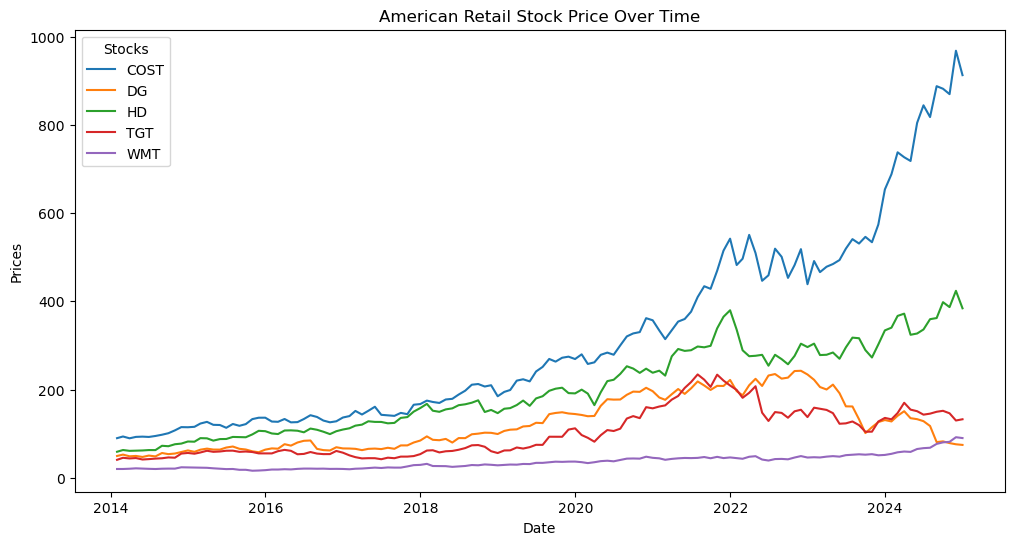

In [13]:
plt.figure(figsize=(12, 6))
for column in monthly_data.columns:
    plt.plot(monthly_data[column], label=column)
plt.title('American Retail Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.grid(False)
plt.legend(title='Stocks')
plt.show()

# Method 1: Manual ARIMA Model

In [79]:
def method1(data):
    model = ARIMA(data, order=(1,1,1))
    results = model.fit()
    forecast = results.forecast(steps=5)
    return forecast

In [80]:
def method1_custom(data, order_tuple):
    model = ARIMA(data, order=order_tuple)
    results = model.fit()
    forecast = results.forecast(steps=5)
    return forecast

In [88]:
wmt_forecast = method1(wmt_data)
wmt_forecast, curr_wmt_data.head()

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2025-01-31    91.711863
 2025-02-28    93.516823
 2025-03-31    95.300385
 2025-04-30    97.062802
 2025-05-31    98.804323
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102753
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [95]:
tgt_forecast = method1(tgt_data)
tgt_forecast, curr_tgt_data.head()

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2025-01-31    129.915170
 2025-02-28    131.896447
 2025-03-31    130.390559
 2025-04-30    131.535123
 2025-05-31    130.665187
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    135.198242
 2025-02-28    122.835732
 2025-03-31    103.180435
 2025-04-30     95.607010
 2025-05-31     94.010002
 Freq: ME, Name: TGT, dtype: float64)

# Method 2: Auto ARIMA Model

In [8]:
def optimal_order(data):
    optimal_model = pm.auto_arima(data, start_p=0, start_q=0, seasonal=False, stepwise=False, suppress_warnings=True, error_action='ignore')
    return optimal_model.order

In [84]:
def method2(data):
    model = ARIMA(data, order=optimal_order(data))
    results=model.fit()
    forecast=results.forecast(steps=5)
    return forecast

In [87]:
method2(wmt_data), curr_wmt_data.head()

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2025-01-31     92.630490
 2025-02-28     94.394456
 2025-03-31     96.390208
 2025-04-30     99.272137
 2025-05-31    101.995326
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    97.655075
 2025-02-28    98.102753
 2025-03-31    87.578255
 2025-04-30    97.015434
 2025-05-31    98.720001
 Freq: ME, Name: WMT, dtype: float64)

In [89]:
method2(tgt_data), curr_tgt_data.head()

(2025-01-31    137.498458
 2025-02-28    132.825106
 2025-03-31    129.656170
 2025-04-30    129.821328
 2025-05-31    129.821328
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    135.198242
 2025-02-28    122.835732
 2025-03-31    103.180435
 2025-04-30     95.607010
 2025-05-31     94.010002
 Freq: ME, Name: TGT, dtype: float64)

In [90]:
method2(cost_data), curr_cost_data.head()

(2025-01-31     924.589379
 2025-02-28     976.936803
 2025-03-31     987.568238
 2025-04-30     995.754453
 2025-05-31    1022.031834
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31     976.172485
 2025-02-28    1045.796753
 2025-03-31     943.242554
 2025-04-30     991.831848
 2025-05-31    1038.740967
 Freq: ME, Name: COST, dtype: float64)

In [91]:
method2(hd_data), curr_hd_data.head()

(2025-01-31    381.508600
 2025-02-28    369.249280
 2025-03-31    378.973049
 2025-04-30    373.230875
 2025-05-31    382.870568
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    406.853638
 2025-02-28    391.665009
 2025-03-31    364.226471
 2025-04-30    358.263550
 2025-05-31    366.015381
 Freq: ME, Name: HD, dtype: float64)

In [92]:
method2(dg_data), curr_dg_data.head()

(2025-01-31    77.105220
 2025-02-28    80.473076
 2025-03-31    78.541921
 2025-04-30    75.932605
 2025-05-31    77.898543
 Freq: ME, Name: predicted_mean, dtype: float64,
 Date
 2025-01-31    70.246201
 2025-02-28    73.330475
 2025-03-31    86.923004
 2025-04-30    93.214706
 2025-05-31    96.756645
 Freq: ME, Name: DG, dtype: float64)

# Plot Historical and Forecast with MatPlotLib

In [71]:
def plot_forecast(historical, forecast, actual, name ='Forecast'):
    his_for = pd.concat([historical, forecast])
    his_act = pd.concat([historical, actual])
    plt.figure(figsize=(6,3))
    plt.title(name + ' vs Actual Prices')    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.plot(his_for[0:5], color='blue', label='Historical')
    plt.plot(his_for[4:], color='orange', label='Forecast')
    plt.plot(his_act[4:], color='red', label='Actual')
    plt.legend()
    plt.grid(True)
    

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


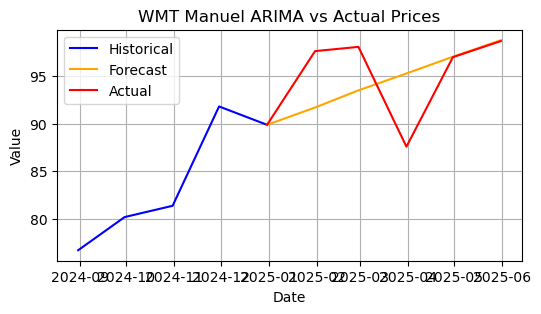

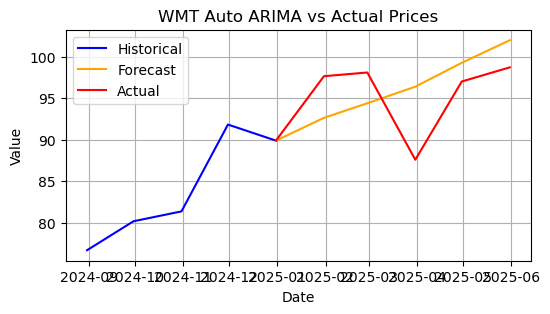

In [102]:
plot_forecast(wmt_data.tail(), method1(wmt_data), curr_wmt_data.head(),'WMT Manuel ARIMA')
plot_forecast(wmt_data.tail(), method2(wmt_data), curr_wmt_data.head(),'WMT Auto ARIMA')

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


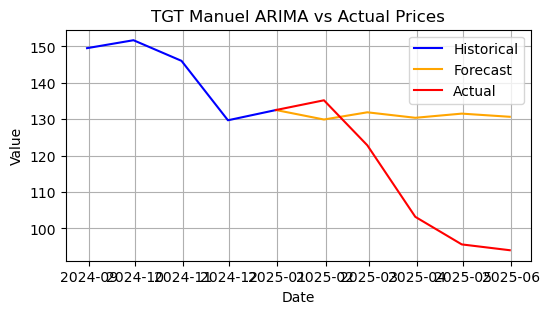

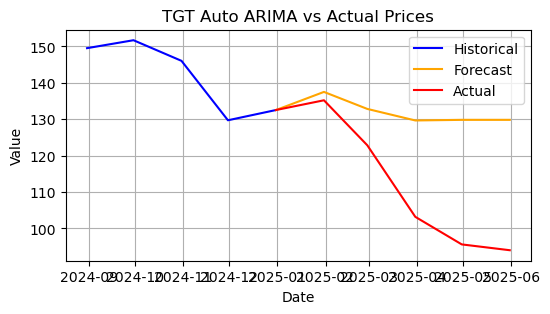

In [105]:
plot_forecast(tgt_data.tail(), method1(tgt_data), curr_tgt_data.head(),'TGT Manuel ARIMA')
plot_forecast(tgt_data.tail(), method2(tgt_data), curr_tgt_data.head(),'TGT Auto ARIMA')

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


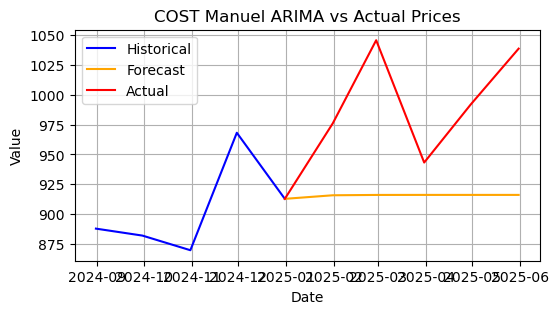

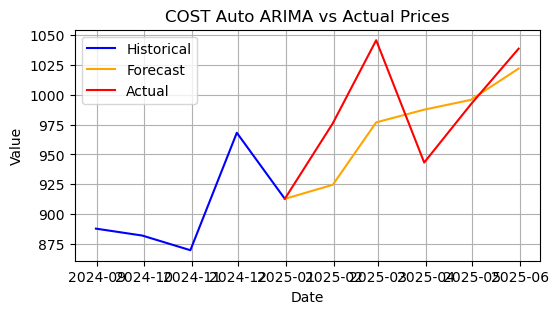

In [103]:
plot_forecast(cost_data.tail(), method1(cost_data), curr_cost_data.head(),'COST Manuel ARIMA')
plot_forecast(cost_data.tail(), method2(cost_data), curr_cost_data.head(),'COST Auto ARIMA')

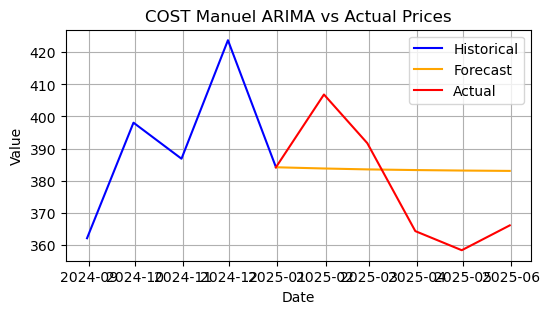

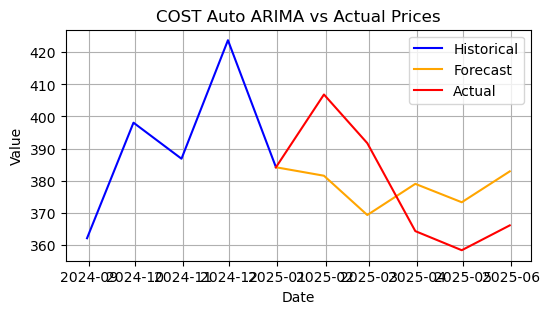

In [106]:
plot_forecast(hd_data.tail(), method1(hd_data), curr_hd_data.head(),'COST Manuel ARIMA')
plot_forecast(hd_data.tail(), method2(hd_data), curr_hd_data.head(),'COST Auto ARIMA')

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


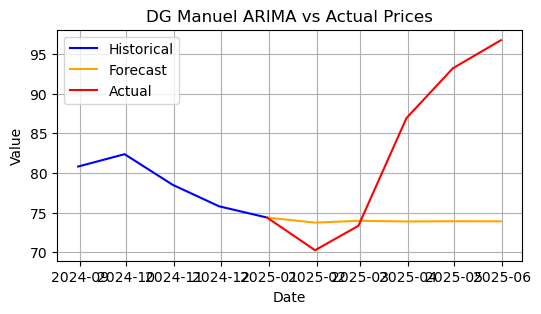

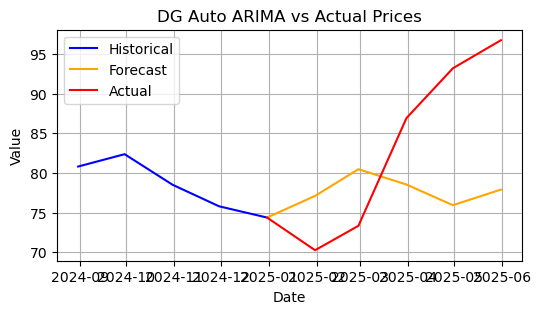

In [107]:
plot_forecast(dg_data.tail(), method1(dg_data), curr_dg_data.head(),'DG Manuel ARIMA')
plot_forecast(dg_data.tail(), method2(dg_data), curr_dg_data.head(),'DG Auto ARIMA')

# Calculate the Root Mean Squared Error (RMSE) of Each Method

In [72]:
def calculate_rmse(predicted, actual):
    return np.sqrt(mean_squared_error(actual, predicted))

In [96]:
print( 'Method 1 RMSE:', calculate_rmse(method1(wmt_data),curr_wmt_data.head()))
print( 'Method 2 RMSE:', calculate_rmse(method2(wmt_data),curr_wmt_data.head()))

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Method 1 RMSE: 4.81649609963026
Method 2 RMSE: 5.147210768836441


C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [97]:
print( 'Method 1 RMSE:', calculate_rmse(method1(tgt_data),curr_tgt_data.head()))
print( 'Method 2 RMSE:', calculate_rmse(method2(tgt_data),curr_tgt_data.head()))

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Method 1 RMSE: 26.40011436015101
Method 2 RMSE: 25.53081977136583


In [98]:
print( 'Method 1 RMSE:', calculate_rmse(method1(cost_data),curr_cost_data.head()))
print( 'Method 2 RMSE:', calculate_rmse(method2(cost_data),curr_cost_data.head()))

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Method 1 RMSE: 91.63787442584037
Method 2 RMSE: 43.95874843994467


In [99]:
print( 'Method 1 RMSE:', calculate_rmse(method1(hd_data),curr_hd_data.head()))
print( 'Method 2 RMSE:', calculate_rmse(method2(hd_data),curr_hd_data.head()))

Method 1 RMSE: 19.3383062205157
Method 2 RMSE: 19.34122804198642


In [100]:
print( 'Method 1 RMSE:', calculate_rmse(method1(dg_data),curr_dg_data.head()))
print( 'Method 2 RMSE:', calculate_rmse(method2(dg_data),curr_dg_data.head()))

C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leonh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Method 1 RMSE: 14.684608395276708
Method 2 RMSE: 12.826570121456259
